In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3> 1. Data Collection </h3>

In [2]:
data = pd.read_csv("/Users/dobaophuc/Downloads/world_internet_user.csv", encoding="latin1")

<h3> 2. Data Cleaning </h3>

In [3]:
data.info

<bound method DataFrame.info of              Country       Region  Population  Internet Users  % of Population
0             _World          NaN  7920539977      5424080321            68.48
1         Afganistan         Asia    40403518         9237489            22.86
2            Albania       Europe     2872758         2191467            76.28
3            Algeria       Africa    45150879        37836425            83.80
4     American Samoa      Oceania       54995           34800            63.28
..               ...          ...         ...             ...              ...
238  Wallis & Futuna      Oceania       10932            6200            56.71
239   Western Sahara       Africa      611875           28000             4.58
240            Yemen  Middle East    30938435         8353377            27.00
241           Zambia       Africa    18920651         9870427            52.17
242         Zimbabwe       Africa    15092171         8400000            55.66

[243 rows x 5 colum

In [4]:
data.duplicated().any() #check if any data is duplicated

False

In [5]:
data.isnull().values.any() #check if any values are null

True

In [6]:
data.isnull().sum() #The data "World" does not have Region value.

Country            0
Region             1
Population         0
Internet Users     0
% of Population    0
dtype: int64

In [7]:
data.fillna(0) #fill missing value with number 0

,Country,Region,Population,Internet Users,% of Population
0,_World,0,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28
...,...,...,...,...,...
238,Wallis & Futuna,Oceania,10932,6200,56.71
239,Western Sahara,Africa,611875,28000,4.58
240,Yemen,Middle East,30938435,8353377,27.00
241,Zambia,Africa,18920651,9870427,52.17


<h3> 3. Data preprocessing</h3>

In [8]:
data['Region'].value_counts()

Africa         58
America        55
Europe         53
Asia           35
Oceania        27
Middle East    14
Name: Region, dtype: int64

Text(0, 0.5, 'Count')

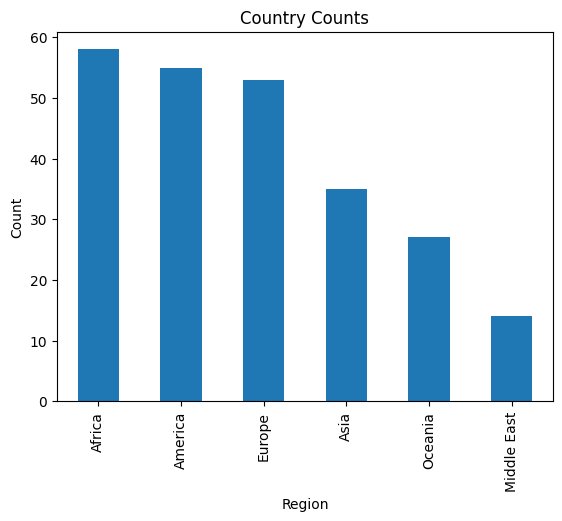

In [9]:
data['Region'].value_counts().plot(kind="bar")
plt.title('Country Counts')
plt.xlabel('Region')
plt.ylabel('Count')

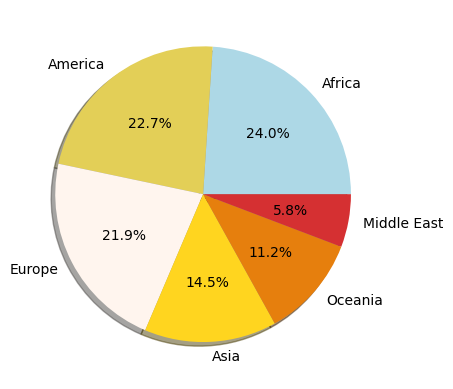

In [10]:
Region = ('Africa','America','Europe','Asia','Oceania','Middle East')
counts = (58,55,53,35,27,14)
colors = ('#ADD8E6','#E3CF57','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(
counts,
labels = Region,
colors= colors,
autopct = '%1.1f%%',
shadow = True)
plt.show()

In [11]:
#Country with most Internet User Percentage
data.rename(columns ={'Internet Users':'Internet_Users', '% of Population':'IU_Percentage'}, inplace = True)
data.head()

,Country,Region,Population,Internet_Users,IU_Percentage
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


<h3>4. Data Analysis and Visualization</h3>
<h4> Bar graph of IU percentage avarage by regions</h4>

In [12]:
data.Region[data.Country == '_World'] = 'World'
data.head()

/var/folders/zl/2tq_gym54j93bt895yh1qct00000gn/T/ipykernel_5522/2929268063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Region[data.Country == '_World'] = 'World'


,Country,Region,Population,Internet_Users,IU_Percentage
0,_World,World,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


In [13]:
IURegion = pd.pivot_table(data,values = ['Population','Internet_Users','IU_Percentage'], index='Region', aggfunc= 'mean')
IURegion.sort_values(by = 'IU_Percentage', ascending = True)
IURegion

,IU_Percentage,Internet_Users,Population
Region,,,
Africa,38.097931,1.036845e+07,2.385330e+07
America,80.781455,1.623539e+07,1.882772e+07
Asia,70.911143,8.382533e+07,1.243477e+08
Europe,89.757925,1.416596e+07,1.580102e+07
Middle East,85.135000,1.527783e+07,1.916449e+07
Oceania,68.101481,1.155254e+06,1.614710e+06
World,68.480000,5.424080e+09,7.920540e+09


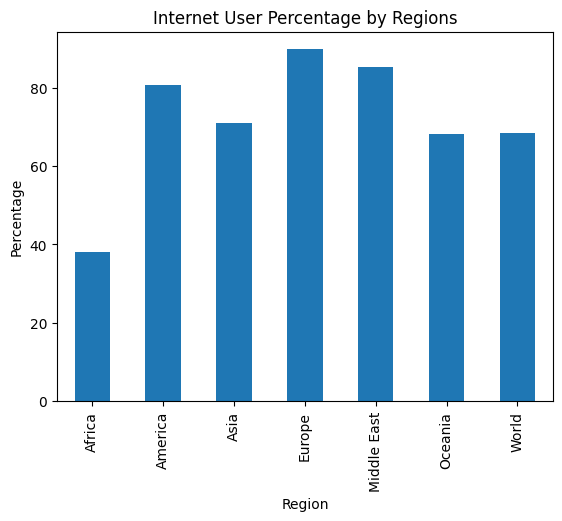

In [14]:
IURegion['IU_Percentage'].plot(kind = 'bar')
plt.title('Internet User Percentage by Regions')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

<h4> Boxplots of Internet User Distribution by Regions </h4>

In [15]:
d = data.drop(0)

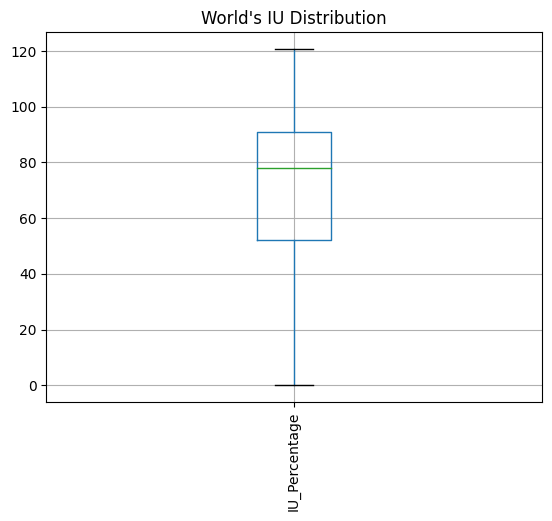

In [16]:
b1 = ['IU_Percentage']

boxplot = d.boxplot(b1)  
plt.xticks(rotation=90)
plt.title("World's IU Distribution")
plt.show()

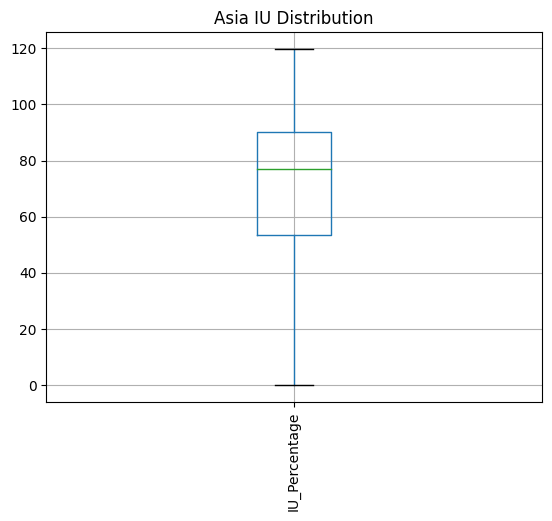

In [17]:
boxplot = d[d['Region'] == 'Asia'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Asia IU Distribution")
plt.show()

<p> * The IU percentage in Asia nearly resembles that of the world's figure</p>

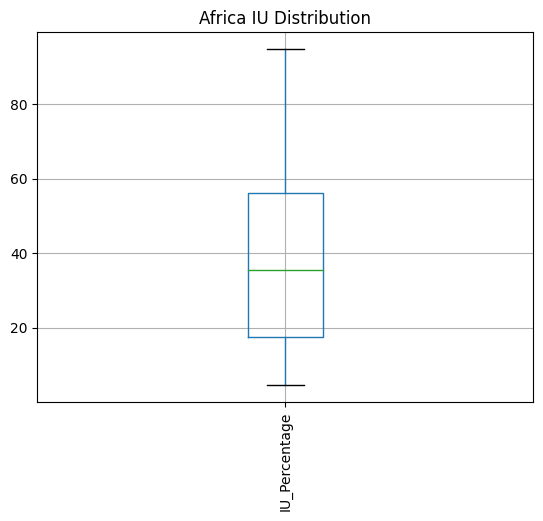

In [18]:
boxplot = d[d['Region'] == 'Africa'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Africa IU Distribution")
plt.show()

<p> * The IU percentage in Africa is still far below the world's level, with <strong>more than 75%</strong> countries having less than <strong>60%</strong> of population using the Internet</p>

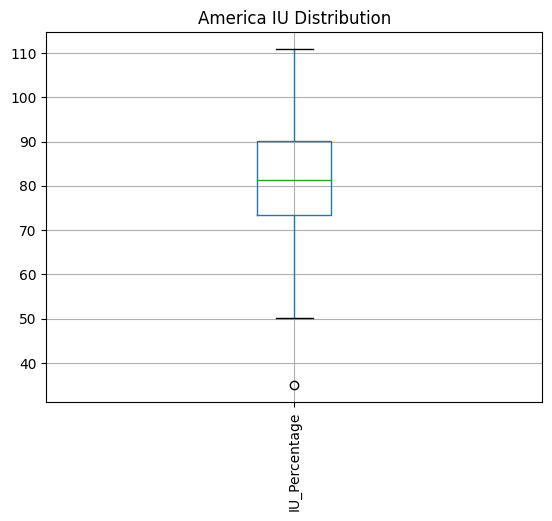

In [19]:
boxplot = d[d['Region'] == 'America'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("America IU Distribution")
plt.show()

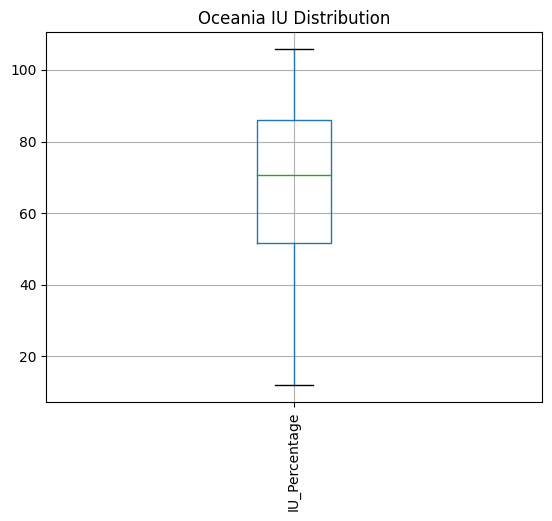

In [20]:
boxplot = d[d['Region'] == 'Oceania'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Oceania IU Distribution")
plt.show()

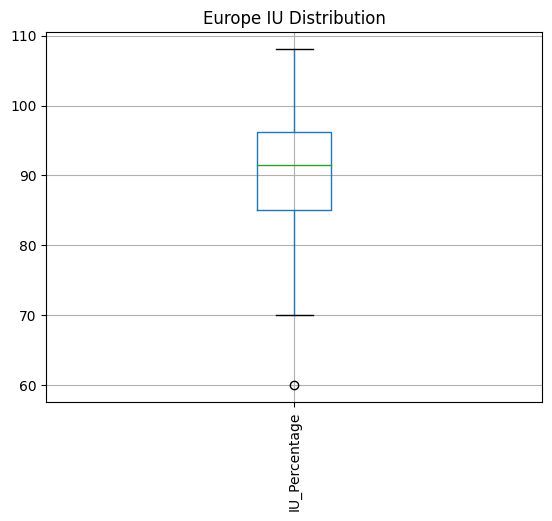

In [21]:
boxplot = d[d['Region'] == 'Europe'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Europe IU Distribution")
plt.show()

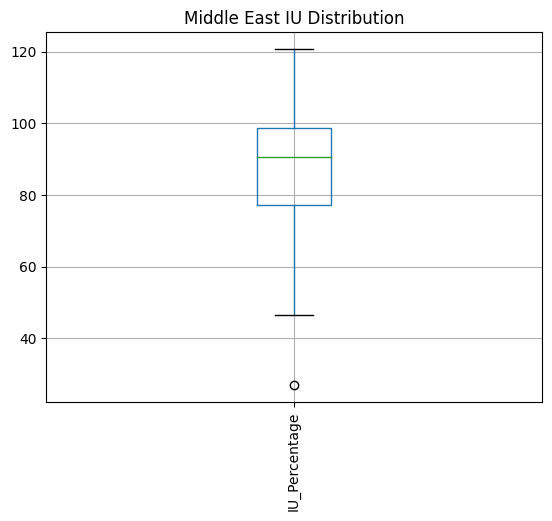

In [22]:
boxplot = d[d['Region'] == 'Middle East'].boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Middle East IU Distribution")
plt.show()

<h4> What is the country with the least Internet User Percentage? </h4>

In [23]:
maxUI = d.sort_values('IU_Percentage', ascending = True)
maxUI.head()

,Country,Region,Population,Internet_Users,IU_Percentage
113,"Korea, North",Asia,25961763,20000,0.08
239,Western Sahara,Africa,611875,28000,4.58
67,Eritrea,Africa,3626986,248199,6.84
198,South Sudan,Africa,11381378,900716,7.91
128,Madagascar,Africa,28427328,2864000,10.07


<p> - North Korea is the only Asian country in top 5 countries with the least Internet User Percentage, along with other 4 African countries. </p>
<p> - More than <strong>99.9 percent</strong> of the country's population remained offline at the start of 2022. </p>
<p> - According to <em>"Digital 2022: North Korea"</em> report from <strong>datareportal.com</strong>, only a few people in the country are able to access international websites, and it seems likely that a sizeable proportion of this small group will be made up of foreign expatriates and the country's political elite </p>

<h4> What is the country with the most Internet User Percentage? </h4>

In [24]:
maxUI.tail()

,Country,Region,Population,Internet_Users,IU_Percentage
57,Cyprus,Europe,1221767,1320400,108.07
40,Cayman Islands,America,66990,73800,110.17
175,Puerto Rico,America,2747603,3047311,110.91
32,Brunei Darussulam,Asia,444336,531800,119.68
228,United Arab Emirates,Middle East,10088517,12176400,120.70


In [25]:
data

,Country,Region,Population,Internet_Users,IU_Percentage
0,_World,World,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28
...,...,...,...,...,...
238,Wallis & Futuna,Oceania,10932,6200,56.71
239,Western Sahara,Africa,611875,28000,4.58
240,Yemen,Middle East,30938435,8353377,27.00
241,Zambia,Africa,18920651,9870427,52.17


<h3>Thank you for watching!</h3>